# Bank Authentication Data Analysis

This notebook will analyse and clean the **Banknote Authentication Data** for best usage in the algorithms comparison.
This data was extracted from the [UCI repository](http://archive.ics.uci.edu/ml/datasets/banknote+authentication) which says that:

    Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Now that we have glance of the data, let's analyze, visualize and clean it.

## Dependencies

In [46]:
# Define the root path
import os
import sys
path = os.getcwd().split('tests')[0]

# Import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_style('darkgrid')
print(sns.__version__)

0.11.1


In [47]:
# Read the raw data and transform it in a DataFrame
df = pd.read_csv(path+'data/raw/data_banknote_authentication.txt', names=
                ['var_wavelet','skewness_wavelet','curtosis_wavelet','entropy','target'])
df.head()

,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Samples and Attributes:

In [48]:
print('Samples: {}'.format(df.shape[0]))
print('Atributes: {}'.format(df.shape[1]))

Samples: 1372
Atributes: 5


## Let's analyze some information about the data.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
var_wavelet         1372 non-null float64
skewness_wavelet    1372 non-null float64
curtosis_wavelet    1372 non-null float64
entropy             1372 non-null float64
target              1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Cool! There are no missing values and we have **4** attributes and **1** target columns. So:

### Numeric Features:

* `var_wavelet`: variance of Wavelet Transformed image (continuous)
* `skewness_wavelet`: skewness of Wavelet Transformed image (continuous)
* `curtosis_wavelet`: curtosis of Wavelet Transformed image (continuous)
* `entropy`: entropy of image (continuous)

### Integer Features
* `target`: class (integer) 

## Let's analyze the data description.

In [50]:
df.describe()

,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Let's analyze if there are some duplicates:

In [51]:
duplicates = df.duplicated()
duplicates.value_counts()

False    1348
True       24
dtype: int64

There are 24 duplicates. We will drop them from the dataset.

In [52]:
df.loc[df.duplicated()==True].index
indexes = df.loc[df.duplicated()==True].index

So let's drop some duplicated data

In [53]:
df_1 = df.drop_duplicates(keep='first')
df_1.reset_index(drop=True, inplace=True)
df_1

,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


Now we will transform the target values, by summing with 1.

In [54]:
df_1.loc[df['target']==1,'target']=2
df_1

C:\Users\Avell\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [55]:
df_1.loc[df_1['target']==0,'target'] = 1

In [56]:
df_1

,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
0,3.621600,8.66610,-2.807300,-0.446990,1
1,4.545900,8.16740,-2.458600,-1.462100,1
2,3.866000,-2.63830,1.924200,0.106450,1
3,3.456600,9.52280,-4.011200,-3.594400,1
4,0.329240,-4.45520,4.571800,-0.988800,1
5,4.368400,9.67180,-3.960600,-3.162500,1
6,3.591200,3.01290,0.728880,0.564210,1
7,2.092200,-6.81000,8.463600,-0.602160,1
8,3.203200,5.75880,-0.753450,-0.612510,1
9,1.535600,9.17720,-2.271800,-0.735350,1


In [57]:
df_1['target'].tail()

1343    2
1344    2
1345    2
1346    2
1347    2
Name: target, dtype: int64

Now, let's visualize 

## Data Visualization

Let's visualize the data distribution and then analyze if the skewness and kurtosis is to high, which may indicate the presence of outliers.

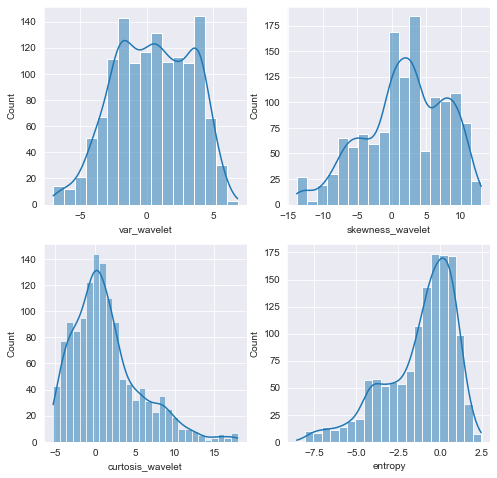

In [58]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
for i in range(4):
    r = int(i/2)
    c = int(i - 2*r)
    sns.histplot(data=df_1,x=df_1.columns.values[i],kde=True,ax=ax[r,c])

In [59]:
skew = df_1.skew()
skew

var_wavelet        -0.158486
skewness_wavelet   -0.403856
curtosis_wavelet    1.088243
entropy            -1.017186
target              0.263676
dtype: float64

So there are only two variables that are shifted, the `curtosis_wavelet` attribute that ir shifted for the right, and the `entropy` that are shifted for the left.

In [60]:
kurt = df_1.kurtosis()
kurt

var_wavelet        -0.775543
skewness_wavelet   -0.420215
curtosis_wavelet    1.248822
entropy             0.503676
target             -1.933346
dtype: float64

The kutosis measurement is below the value of 3, so it's not pointy. Let's take a look at the outliers.

In [61]:
import scipy as sp
def mahalanobis(x):
    
    diff = x - x.mean()
    cov =x.cov().values
    try:
        chole = np.linalg.cholesky(cov)
    except:
        print("The covariance is not symmetric neither positive definite")
    
    inv = sp.linalg.inv(cov)
    
    left = diff.values@inv
    mahal = left@diff.values.T
    return pd.DataFrame(mahal.diagonal(),columns=['mahalanobis'])

mahal = mahalanobis(df_1[df_1.columns.values[:-1]])
mahal.head()
        

,mahalanobis
0,2.673548
1,2.628637
2,3.236597
3,3.443847
4,1.920261


In [62]:
deg = df.shape[1]-1
deg

4

In [63]:
value = sp.stats.chi2.ppf((1-0.05),df=deg)
value

9.487729036781154

In [64]:
mahal[mahal['mahalanobis']>value]

,mahalanobis
45,10.227452
98,10.084879
125,14.176489
149,10.591247
170,10.028067
182,11.117473
191,11.953125
198,10.227456
216,12.512697
226,11.605394


In [65]:
df_1 = df_1.drop(index=list(mahal[mahal['mahalanobis']>value].index))
df_1 = df_1.reset_index(drop=True)

In [66]:
df_1

,var_wavelet,skewness_wavelet,curtosis_wavelet,entropy,target
0,3.621600,8.666100,-2.807300,-0.446990,1
1,4.545900,8.167400,-2.458600,-1.462100,1
2,3.866000,-2.638300,1.924200,0.106450,1
3,3.456600,9.522800,-4.011200,-3.594400,1
4,0.329240,-4.455200,4.571800,-0.988800,1
5,4.368400,9.671800,-3.960600,-3.162500,1
6,3.591200,3.012900,0.728880,0.564210,1
7,2.092200,-6.810000,8.463600,-0.602160,1
8,3.203200,5.758800,-0.753450,-0.612510,1
9,1.535600,9.177200,-2.271800,-0.735350,1


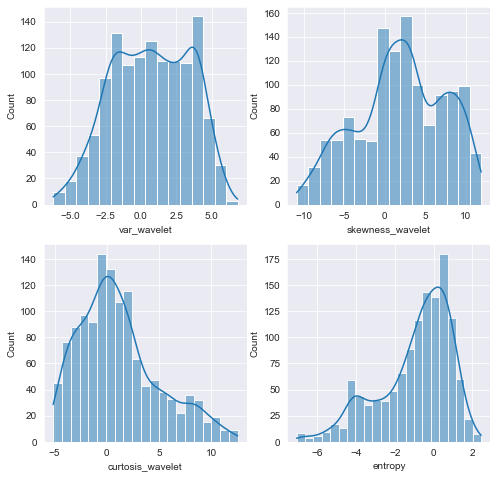

In [67]:
fig, ax = plt.subplots(2,2,figsize=(8,8))
for i in range(4):
    r = int(i/2)
    c = int(i-r*2)
    sns.histplot(data=df_1,x=df_1.columns.values[i],kde=True,ax=ax[r,c])

In [68]:
skew = df_1.skew()

In [69]:
skew

var_wavelet        -0.132421
skewness_wavelet   -0.233766
curtosis_wavelet    0.747269
entropy            -0.913131
target              0.327995
dtype: float64

In [70]:
kurt = df_1.kurtosis()
kurt

var_wavelet        -0.870089
skewness_wavelet   -0.740641
curtosis_wavelet    0.015232
entropy             0.187707
target             -1.895426
dtype: float64

Cool, no null values, no duplicated values and no outliers!

Now let's visualize the boxplot of the attributes.

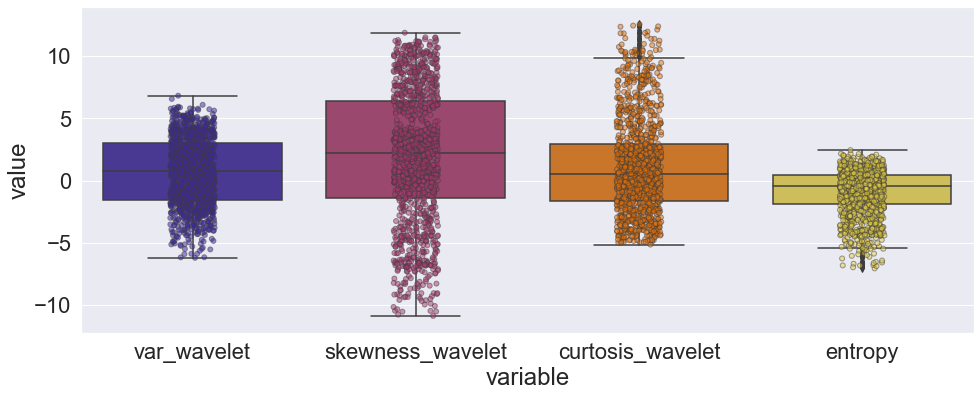

In [71]:

plt.figure(figsize=(16, 6))
sns.set(font_scale=2)
ax = sns.boxplot(x='variable',y='value',
                 data=pd.melt(df_1[['var_wavelet','skewness_wavelet','curtosis_wavelet','entropy']]),
                palette='CMRmap',saturation=0.7)
sns.stripplot(x="variable", y="value", data=pd.melt(df_1[['var_wavelet','skewness_wavelet','curtosis_wavelet','entropy']]),
                   palette='CMRmap',linewidth=1, alpha=0.5)

The good news is that there are not so much variance, but we can find some outliers for the `curtosis_wavelet` attribute.

Now let's see the distribution of the boxplot by target.

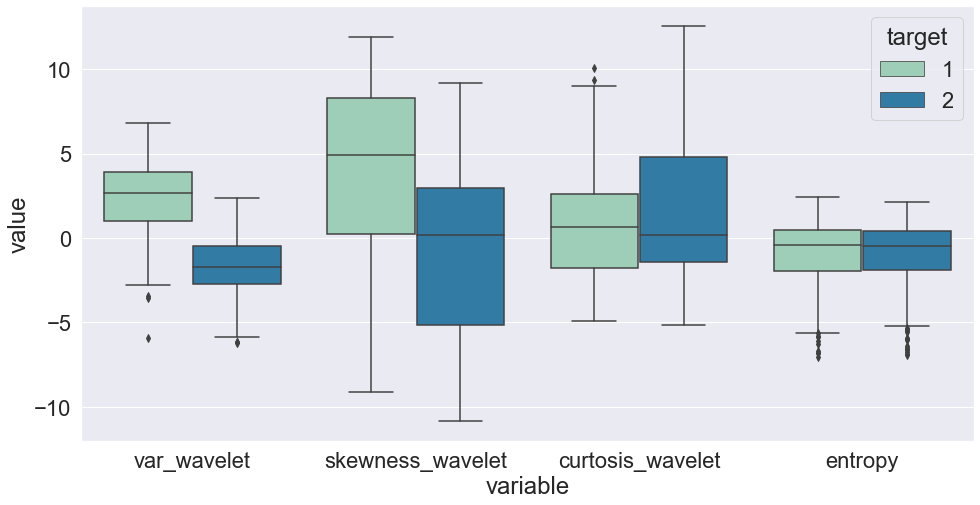

In [72]:
df_melt = pd.melt(df_1,'target')
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
sns.set(font_scale=2)
sns.boxplot(x='variable',hue='target',y='value',data=df_melt,palette='YlGnBu')

We can see that the most outliers of `curtosis_wavelet` belongs to the target *1*.
But the `var_wavelet` and the `skewness_wavelet` shows some separation in their distributions per target value, we will better see that by plotting a pairplot.

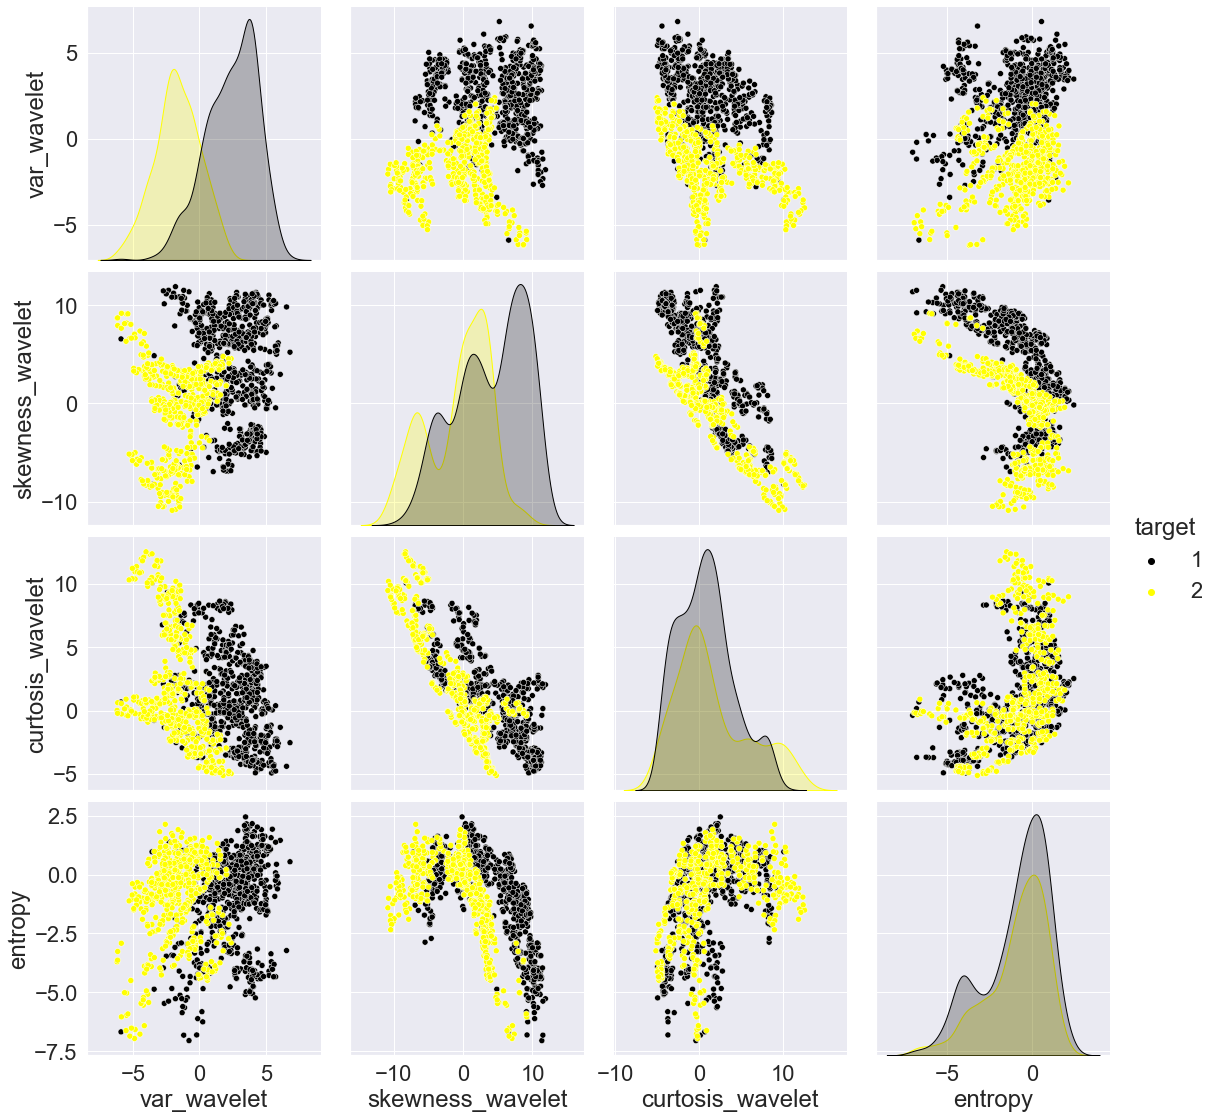

In [73]:

sns.pairplot(df_1,hue='target',palette='gnuplot',kind='scatter', diag_kind='kde',
            height=4)


We can see that there are a smooth separation in the distributions of the `var_wavelet` and litte less in the `skewness_wavelet`.
Now we will anayze the correlation between attributes.

(4, 0)

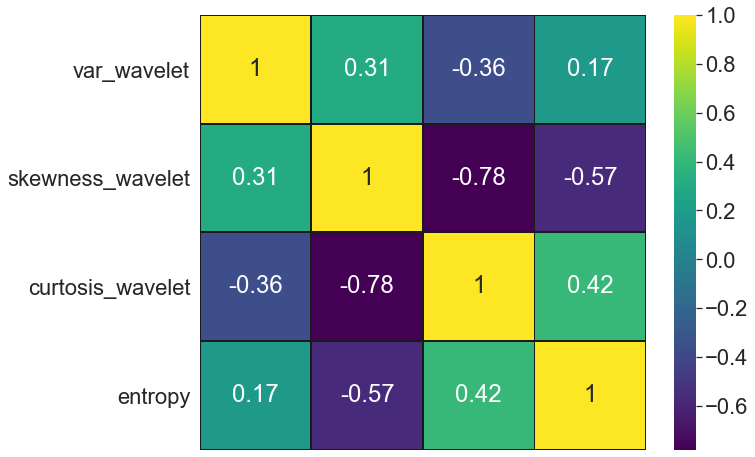

In [74]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_1[df_1.columns.values[:-1]].corr(), cmap='viridis',linecolor='k',linewidth=1,yticklabels=1, xticklabels=False,annot=True)
ax.set_ylim([4,0])



The higher correlations are between `skewness_wavelet` with `cutosis_wavelet` and `entropy`, now we will see the accumulation variance of the Principal Components by using the PCA class of the `sklearn` library.

In [75]:
scale = StandardScaler()

X = scale.fit_transform(df_1[df_1.columns.values[:-1]].values)

In [76]:
pca = PCA()
x = pca.fit_transform(X)
cum = pca.explained_variance_ratio_
print(cum)

[0.56833726 0.29310392 0.09068608 0.04787274]


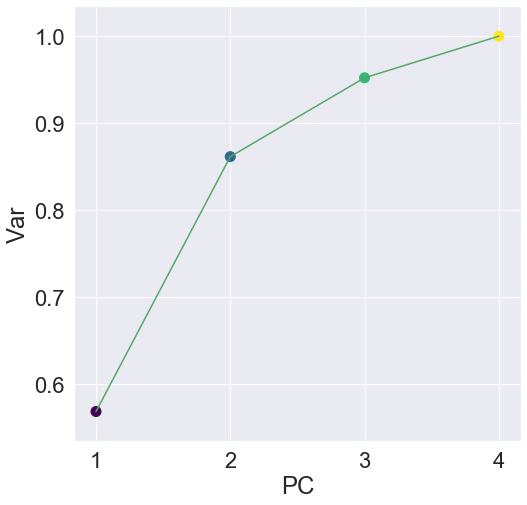

In [77]:
fig = plt.figure(figsize=(8,8))
plt.scatter(np.arange(cum.size)+1,np.cumsum(cum), s=100, c=cm.get_cmap('viridis', cum.size).colors)
plt.plot(np.arange(cum.size)+1,np.cumsum(cum),c='g')
plt.xlabel('PC')
plt.ylabel('Var')
plt.show()

In [83]:
cum_sum = np.cumsum(cum)
cum_sum

array([0.56833726, 0.86144118, 0.95212726, 1.        ])

Now we will concatenate the principal components that reachs 95% of the variance!

In [86]:
np.where(cum_sum>0.95)[0][0]

2

In [92]:
df_pca = pd.DataFrame(data=x[:,:3], columns=['PC'+str(i+1) for i in range(3)])

final_df = pd.concat([df_pca, df_1[['target']]], axis = 1)

In [94]:
final_df = final_df.dropna()
final_df

,PC1,PC2,PC3,target
0,-1.549543,-1.100978,-0.303386,1
1,-1.765206,-1.035345,0.274862,1
2,0.597542,-1.256598,0.480869,1
3,-2.561721,-0.071352,0.506779,1
4,1.294944,0.198327,0.574171,1
5,-2.555874,-0.474242,0.548621,1
6,-0.107065,-1.336258,-0.009282,1
7,2.093090,-0.334927,1.417975,1
8,-0.894782,-0.876798,0.029694,1
9,-1.395671,-0.381906,-0.549081,1


Now let's visualize as a scatter plot

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, crest, crest_r, cubehelix, cubehelix_r, flag, flag_r, flare, flare_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


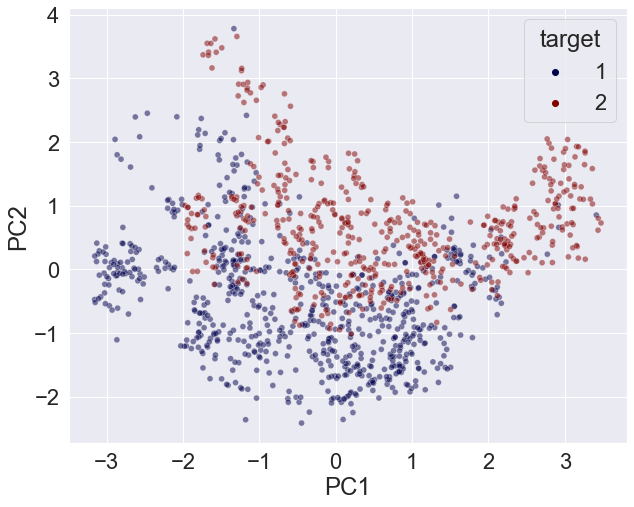

In [95]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',hue='target', data=final_df, palette='seismic', alpha=0.5)

Now, let's save the data.

In [97]:
df_1.to_csv(path+'data/cleaned/bank.csv', index=False)